# DS219 EDA HW: Assignment-5

Name: Ze Song\
Dataset: Adult Income\
This Notebook is used to analyze the 'Adult' dataset from the UCI website. \
Link: https://archive.ics.uci.edu/dataset/2/adult \
Date: 10/08/2025

##1. Importing Data and Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Column names from UCI documentation
cols = ["age","workclass","fnlwgt","education","education-num",
        "marital-status","occupation","relationship","race","sex",
        "capital-gain","capital-loss","hours-per-week","native-country","income"]

# Dataset URLs
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Read data
df_train = pd.read_csv(train_url, names=cols, na_values="?", skipinitialspace=True)
df_test  = pd.read_csv(test_url,  names=cols, na_values="?", skipinitialspace=True, skiprows=1)

# Fix test income labels
df_test["income"] = df_test["income"].str.replace(".", "", regex=False)

# Combine train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
print(f"The dataset's shape is: {df.shape}")
df.head()

The dataset's shape is: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


So this dataset has a total of 48842 observations with 15 features for each observation.

##2. Perform Exploratory Data Analysis(EDA)

In [ ]:
# Check column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


Based on the results obtained above, we have missing values from the following features: work_class, occupation, and native_country.

In [ ]:
# Summary statistics for numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Unique categories and counts for object columns
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # top 10 most common categories


Column: workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Column: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
Name: count, dtype: int64

Column: marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service      

#### EDA Visualizations

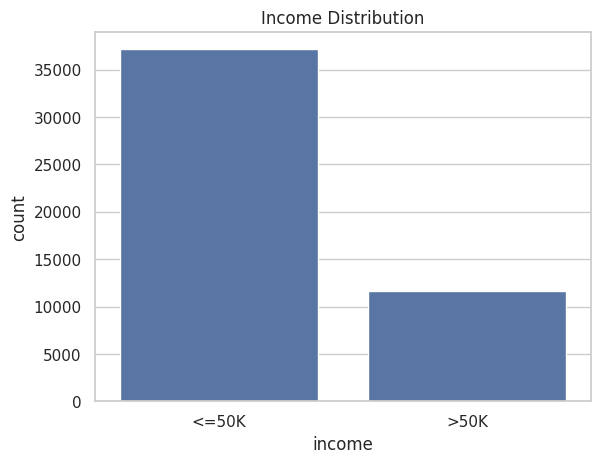

In [ ]:
sns.set(style="whitegrid")
# Target variable distribution (Income)
sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()

In this dataset, there are significantly more individuals that are earning less than or equal to 50K than those who earn more than 50K

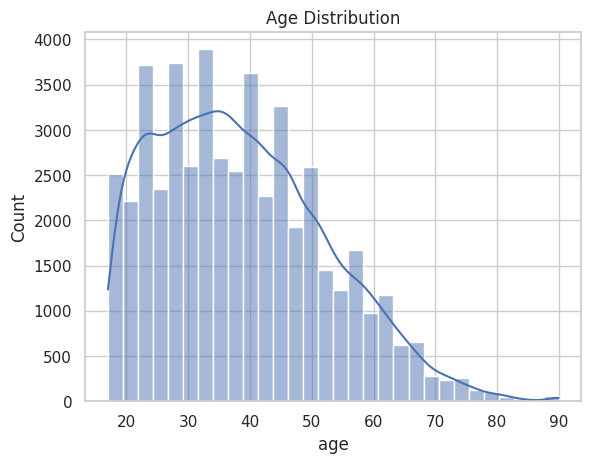

In [ ]:
# Age distribution
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In this dataset, most individuals are aged between 20-50 years old.

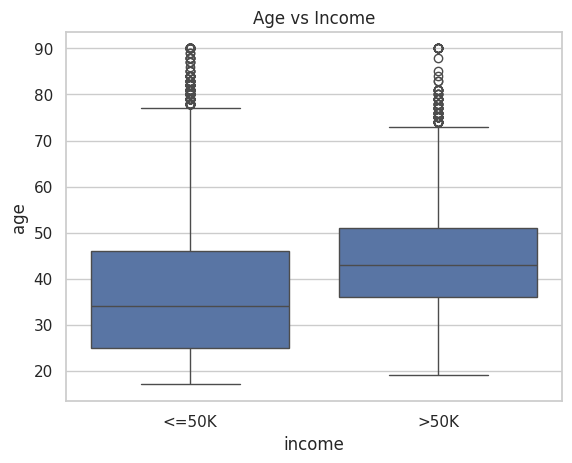

In [ ]:
# Age vs Income Boxplot
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs Income")
plt.show()

According to this dataset, individuals that are older tends to have greater income

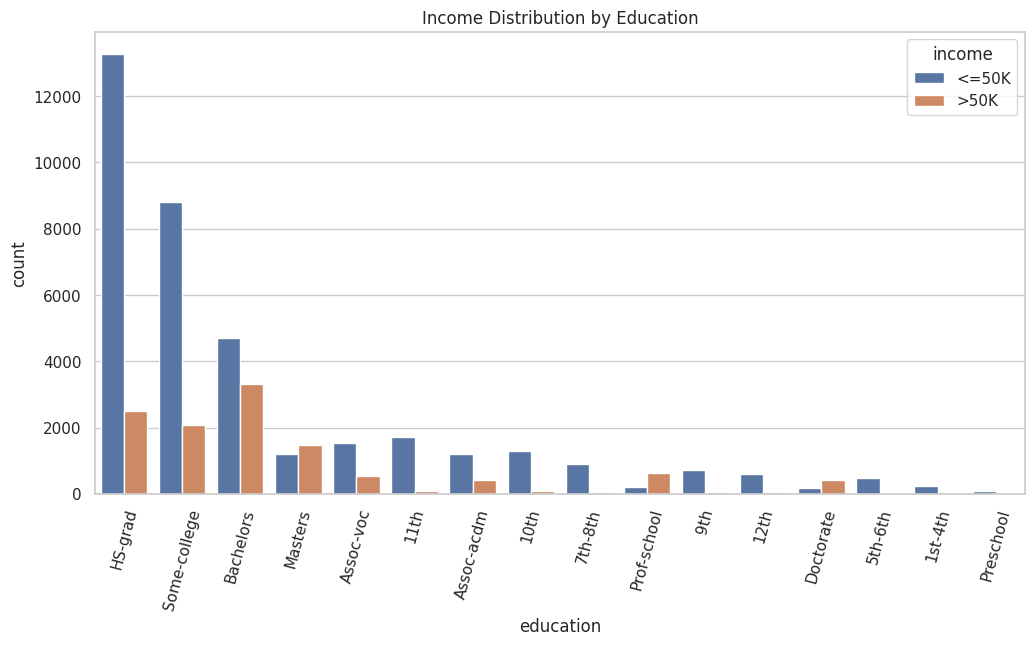

In [ ]:
# Education vs Income
plt.figure(figsize=(12,6))
sns.countplot(x="education", hue="income", data=df,
              order=df["education"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Income Distribution by Education")
plt.show()


This implies that higher education level might leads to greater income.

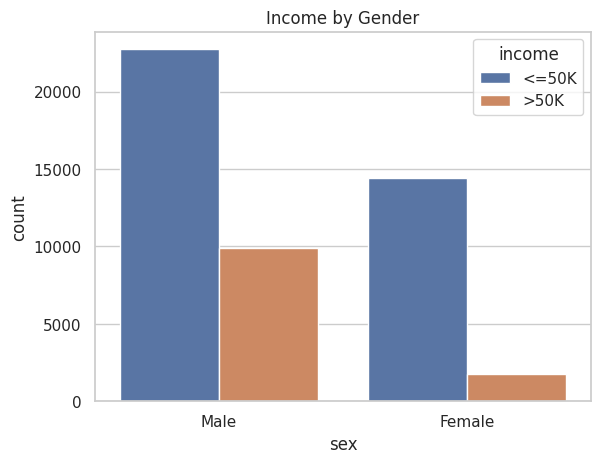

In [ ]:
# Gender vs Income
sns.countplot(x="sex", hue="income", data=df)
plt.title("Income by Gender")
plt.show()

Based on the dataset, there is a greater proportion of male individuals that are earning more than 50K than their female counterpart.

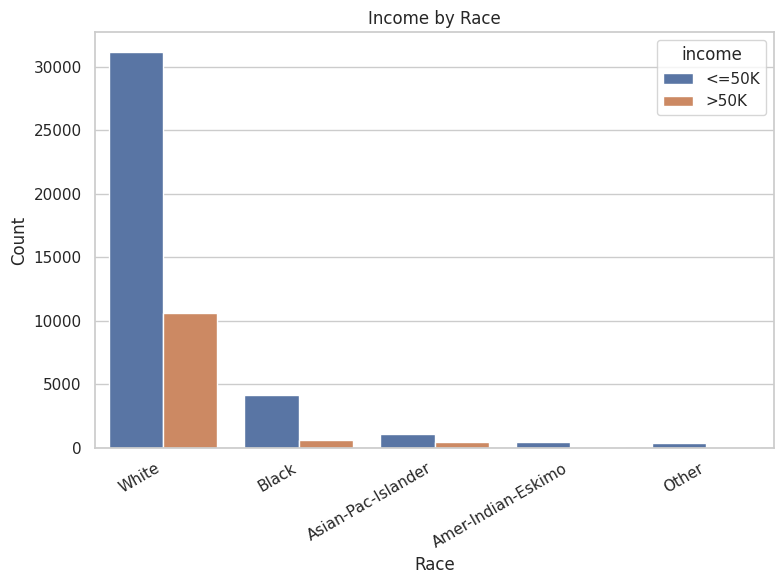

In [ ]:
# Race vs Income
plt.figure(figsize=(8,6))
sns.countplot(x="race", hue="income", data=df,
              order=df["race"].value_counts().index)

plt.title("Income by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

The information recorded in this dataset reflects a strong disproportion between white people and other minority groups

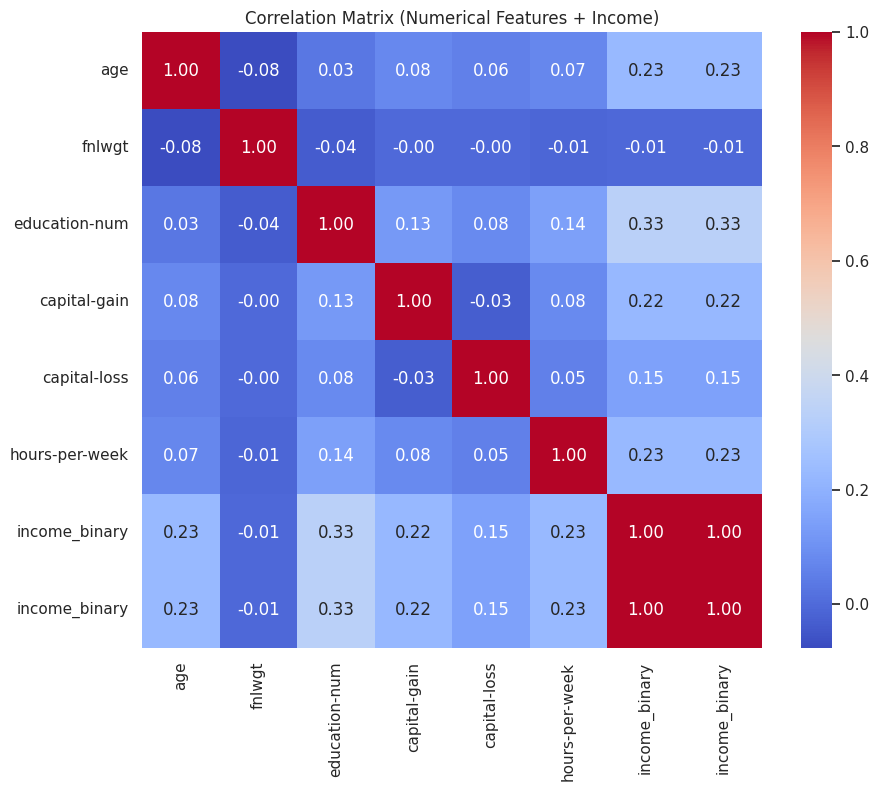

In [ ]:
# Correlation matrix between all the independent variables against the predicted variable(Income Class)
# Encode income: <=50K = 0, >50K = 1
df["income_binary"] = df["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)
# Select numeric columns only + target
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.append("income_binary")
df_corr = df[numeric_cols].corr()
df_corr
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features + Income)")
plt.show()

### EDA Stage Summary of Insights:
1. The data set is imbalanced, with about 76% of individuals earn <= 50K while around 24% earn > 50K.
2. The dataset contains individuals aged between 25-45 years old, while higher income(>50K) is usually associated with older individuals(median age is higher).
3. The most common recorded education level are high school graduates, some-college, and bachelor degree.
4. There are more male recorded in this dataset than female. Moreover, Male are more likely to earn more than 50K compared to women, highlighting a gender income gap.
5. The majority of individuals recorded in this dataset are While, with much smaller representation from other racial groups such as black, asian-pac-islander, amer-indian-eskimo.
6. Based on the final correlation matrix, the stongest positive correlations with income are: education-num(0.33), age(0.23), hours-per-week(0.23), and capital gain(0.22). While fnlwgt(sampling weight) shows no meaningful correlation.

##3. Formulate Hypothesis

#### Hypothesis 1: Education Level and Income
Null Hypothesis(H0): Education level has no relationship with income. The proportion of people earning more than 50K is the same across all education levels
Alternative Hypothesis(H1): Education level is associated with income. The individuals with higher education are more likely to earn more than 50K\
Rationale: My EDA results showed that income distribution varies significantly across education categories. The correlation analysis also highlighted education-num as the strongest predictor(~0.33). This suggests that education level plays a critical role in influencing income levels

#### Hypothesis 2: Gender and Income
Null Hypothesis(H0): Gender has no relationship with income. The proportion of people earning less than 50K is the same for males and females\
Alternative Hypothesis(H1): Gender is associated with income. Male individuals are more likely to earn less than 50K than females\
Rationale: EDA visualization implies that there is a larger proportion of male population fall into the >50K income cateogry compared to women, indicating a potential gender-related income disparity

##4. Hypothesis Testing

#### Hypothesis 1: Education vs. Income
Test Choice: Chi-squared \
Why appropriate: Because both education and income(50K threshold) are categorical variables. The Chi-squared test checks whether the distribution of income levels are correlated with education levels.


In [ ]:
# Hypothesis 1 Testing: Education vs Income
print("=== TESTING HYPOTHESIS 1: Education vs Income ===")

from scipy.stats import chi2_contingency

edu_income_ct = pd.crosstab(df['education'], df['income'])

chi2, p, dof, expected = chi2_contingency(edu_income_ct)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("Reject H0: There is a significant relationship between education and income.")
else:
    print("Fail to Reject H0: No significant relationship between education and income.")

=== TESTING HYPOTHESIS 1: Education vs Income ===
Chi-square statistic: 6537.9730
Degrees of freedom: 15
p-value: 0.0000
Reject H0: There is a significant relationship between education and income.


#### Hypothesis 2: Gender vs. Income
Test Choice: Chi-squared \
Why appropriate: Because both gender and income(50K threshold) are categorical variables. The Chi-squared test checks whether the distribution of income levels are influenced by individuals' education levels.

In [ ]:
# Hypothesis 2 Testing: Gender vs Income
print("=== TESTING HYPOTHESIS 2: Gender vs Income ===")

gender_income_ct = pd.crosstab(df['sex'], df['income'])

chi2, p, dof, expected = chi2_contingency(gender_income_ct)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("Reject H0: There is a significant relationship between gender and income.")
else:
    print("Fail to Reject H0: No significant relationship between gender and income.")

=== TESTING HYPOTHESIS 2: Gender vs Income ===
Chi-square statistic: 2248.8477
Degrees of freedom: 1
p-value: 0.0000
Reject H0: There is a significant relationship between gender and income.


## Summary and Conclusions

Just like what I have expected from the EDA visualization part, the individuals' income levels are correlated with both education level and gender. The hypothesis testing also validate such point.  

Besides, I want to mention a bouns detail I have noticed in this case. Taking example of if we want to examine whether there is a correlation between racial groups vs. income levels. Due to the nature of this dataset, there are significantly larger amount of individuals recorded are white, while other racial groups are much less records on file. So in order to study this correlation, we must normalize the data by only focusing on the percentage of individuals within each racial groups that are earning more than or less than or equal to 50K instead of just saying: "Based on the EDA stage visualization, the bar that represents the amount of individuals that are earning more than 50K is much taller than the ones that represent people earning more than 50K in other racial groups". Such logic can also be applied to other scenarios as well as incorrectly interpret it are highly likely to lead to incorrect insights

## Future Research:
1. Explore the interaction between education, occupation, and income to identify which job sectors benefit most from advanced degrees.
2. Investigate race and gender interactions to study intersectional disparities in income.
3. Apply predictive modeling (e.g., logistic regression, decision trees, or ensemble methods) to quantify feature importance and build an income prediction model.
4. Consider using resampling or balancing methods since the dataset has class imbalance (more ≤50K than >50K cases).